<a href="https://colab.research.google.com/github/VictorBbt/SketchToReality/blob/main/stablediffusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Stable Diffusion** 🎨
*...using `🧨diffusers`*

In [2]:
!nvidia-smi

Wed Mar  6 13:42:01 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P8              12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [3]:
!pip install diffusers==0.11.1
!pip install transformers scipy ftfy accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.9/524.9 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.4/53.4 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.0/280.0 kB 13.7 MB/s eta 0:00:00


In [ ]:
import torch
from diffusers import StableDiffusionPipeline

torch_device = "cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu"
if "mps" == torch_device: os.environ['PYTORCH_ENABLE_MPS_FALLBACK'] = "1"
print(torch_device)

pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4", torch_dtype=torch.float16).to(torch_device)

cuda


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

text_encoder/pytorch_model.fp16.safetensors not found


Fetching 30 files:   0%|          | 0/30 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/608M [00:00<?, ?B/s]

pytorch_model.fp16.bin:   0%|          | 0.00/608M [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

(…)kpoints/scheduler_config-checkpoint.json:   0%|          | 0.00/209 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/492M [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

pytorch_model.fp16.bin:   0%|          | 0.00/246M [00:00<?, ?B/s]

In [ ]:
def generate_images_from_prompts(prompts, num_inference_steps, save_images=False):
  images = []
  for i, prompt in enumerate(prompts):
    image = pipe(prompt, num_inference_steps=num_inference_steps).images[0]
    if save_images:
      image.save(f"image_{i}.png")
    images.append(image)
  return images


In [ ]:
prompts = ["a photograph of an astronaut riding a horse"]
images = generate_images_from_prompts(prompts, 10, save_images=False)


In [ ]:
images[0]

### Generate with StableDiffusions with the prompts we got from the Image Captioning

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec
import pandas as pd
from PIL import Image

In [28]:
prompt1_df = pd.read_csv('./results_LLava_captioning/res_prompt1.csv')
# Get original images for later 
original_images = [Image.open(path) for path in prompt1_df['ImageName']]
prompt1 = prompt1_df['Prompts'].to_list()[0]
captions = prompt1_df['Answers']
captions1 = captions.to_list()

In [ ]:
inference_steps = 50
print(f'Generating with captions obtained from Llava: {prompt1}')
images_generated_prompt1 = generate_images_from_prompts(captions1, inference_steps, save_images=False)

In [ ]:
prompt2_df = pd.read_csv('./results_LLava_captioning/res_prompt2.csv')
prompt2 = prompt2_df['Prompts'].to_list()[0]
captions = prompt2_df['Answers']
captions2 = captions.to_list()
print(f'Generating with captions obtained from Llava: {prompt2}')
images_generated_prompt2 = generate_images_from_prompts(captions2, inference_steps, save_images=False)

In [ ]:
prompt3_df = pd.read_csv('./results_LLava_captioning/res_prompt3.csv')
prompt3 = prompt3_df['Prompts'].to_list()[0]
captions = prompt3_df['Answers']
captions3 = captions.to_list()
print(f'Generating with captions obtained from Llava: {prompt3}')
images_generated_prompt3 = generate_images_from_prompts(captions3, inference_steps, save_images=False)

### Visualization of the results

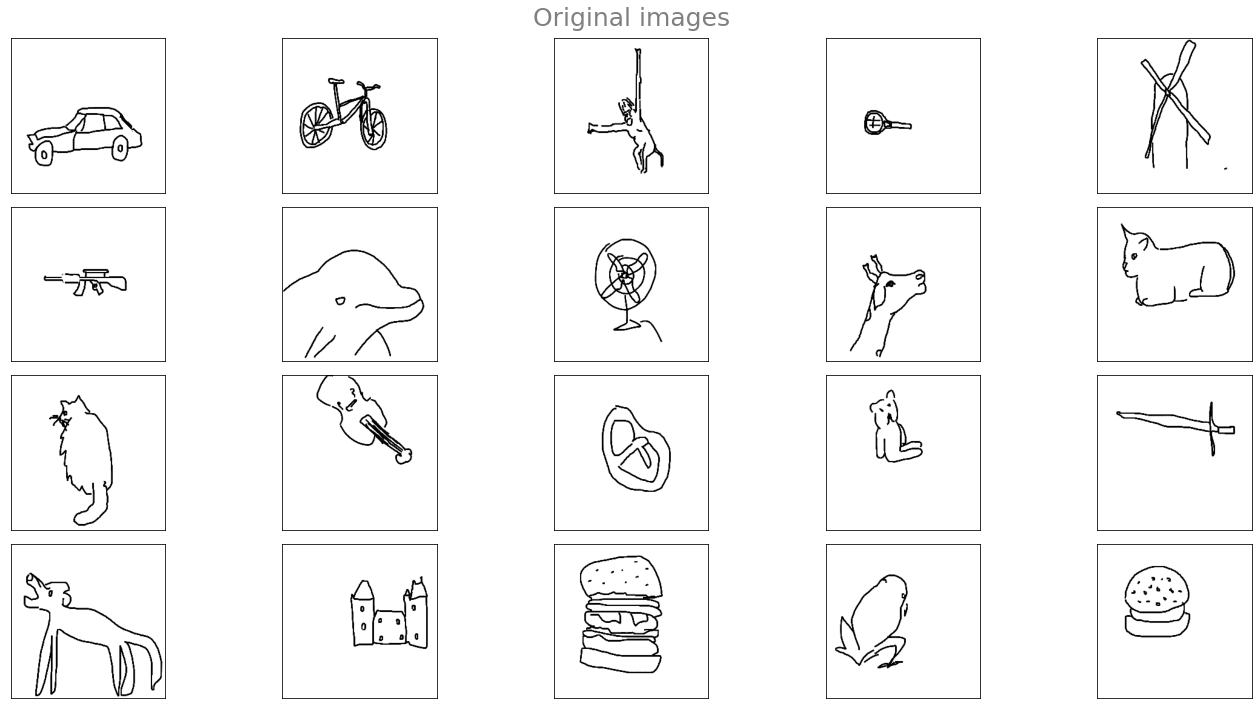

In [34]:
def plot_mosaic(images, n_row=4, n_column=5, title='', save_path=None):

    fig, axes = plt.subplots(n_row, n_column, figsize=(20, 10))
    axes = axes.flatten()
    n_to_plot = min(len(images), n_row*n_column)

    for i in range(n_to_plot):
        ax = axes[i]
        ax.imshow(images[i])
        ax.set_xticks([])
        ax.set_yticks([])

    plt.suptitle(title, fontsize=25, color='grey')
    plt.tight_layout()
    if save_path is not None:
        t = title if title != '' else 'fig'
        plt.savefig(save_path + '/' + t)
    plt.show()

plot_mosaic(original_images, title='Original images', save_path='./results_Llava_captioning')

In [42]:
a = {1:[1, 2], 3:[3, 4, 5]}

min_img = min(len(item) for item in a.values())
min_img

2

In [58]:
# Plots two sets of images, can be adapted to plot n
def compare_grid_plot(dict_image_sets, n_row=5, n_column=4, save_path=None):
    '''
    dict_image_sets: {name of the set ('original_images', 'prompt1'): list of images}
    n_row and n_column should be set in order that all images are plot
    '''
    n_sets = len(dict_image_sets)
    list_sets_names = list(dict_image_sets.keys())
    list_sets_images = list(dict_image_sets.values())
    min_img = min(len(item) for item in dict_image_sets.values())
    n_to_plot = min(min_img, n_row*n_column)
    fig = plt.figure(figsize=(25, 20))

    subfigs = fig.subfigures(n_sets//2 + n_sets%2, 2) # Change here to plot n sets

    for outerind, subfig in enumerate(subfigs.flat):
        if outerind < len(dict_image_sets):
            suptitle = list_sets_names[outerind]
            images_data = list_sets_images[outerind]
            subfig.suptitle(suptitle, color = 'grey', fontsize = 25)
            axs = subfig.subplots(n_row, n_column)
            for innerind, ax in enumerate(axs.flat):
                if innerind < n_to_plot:
                    ax.imshow(images_data[innerind])
                    ax.set_xticks([])
                    ax.set_yticks([])
                else:
                    break
        else:
            break

    if save_path is not None:
        plt.savefig(save_path)
    plt.show()

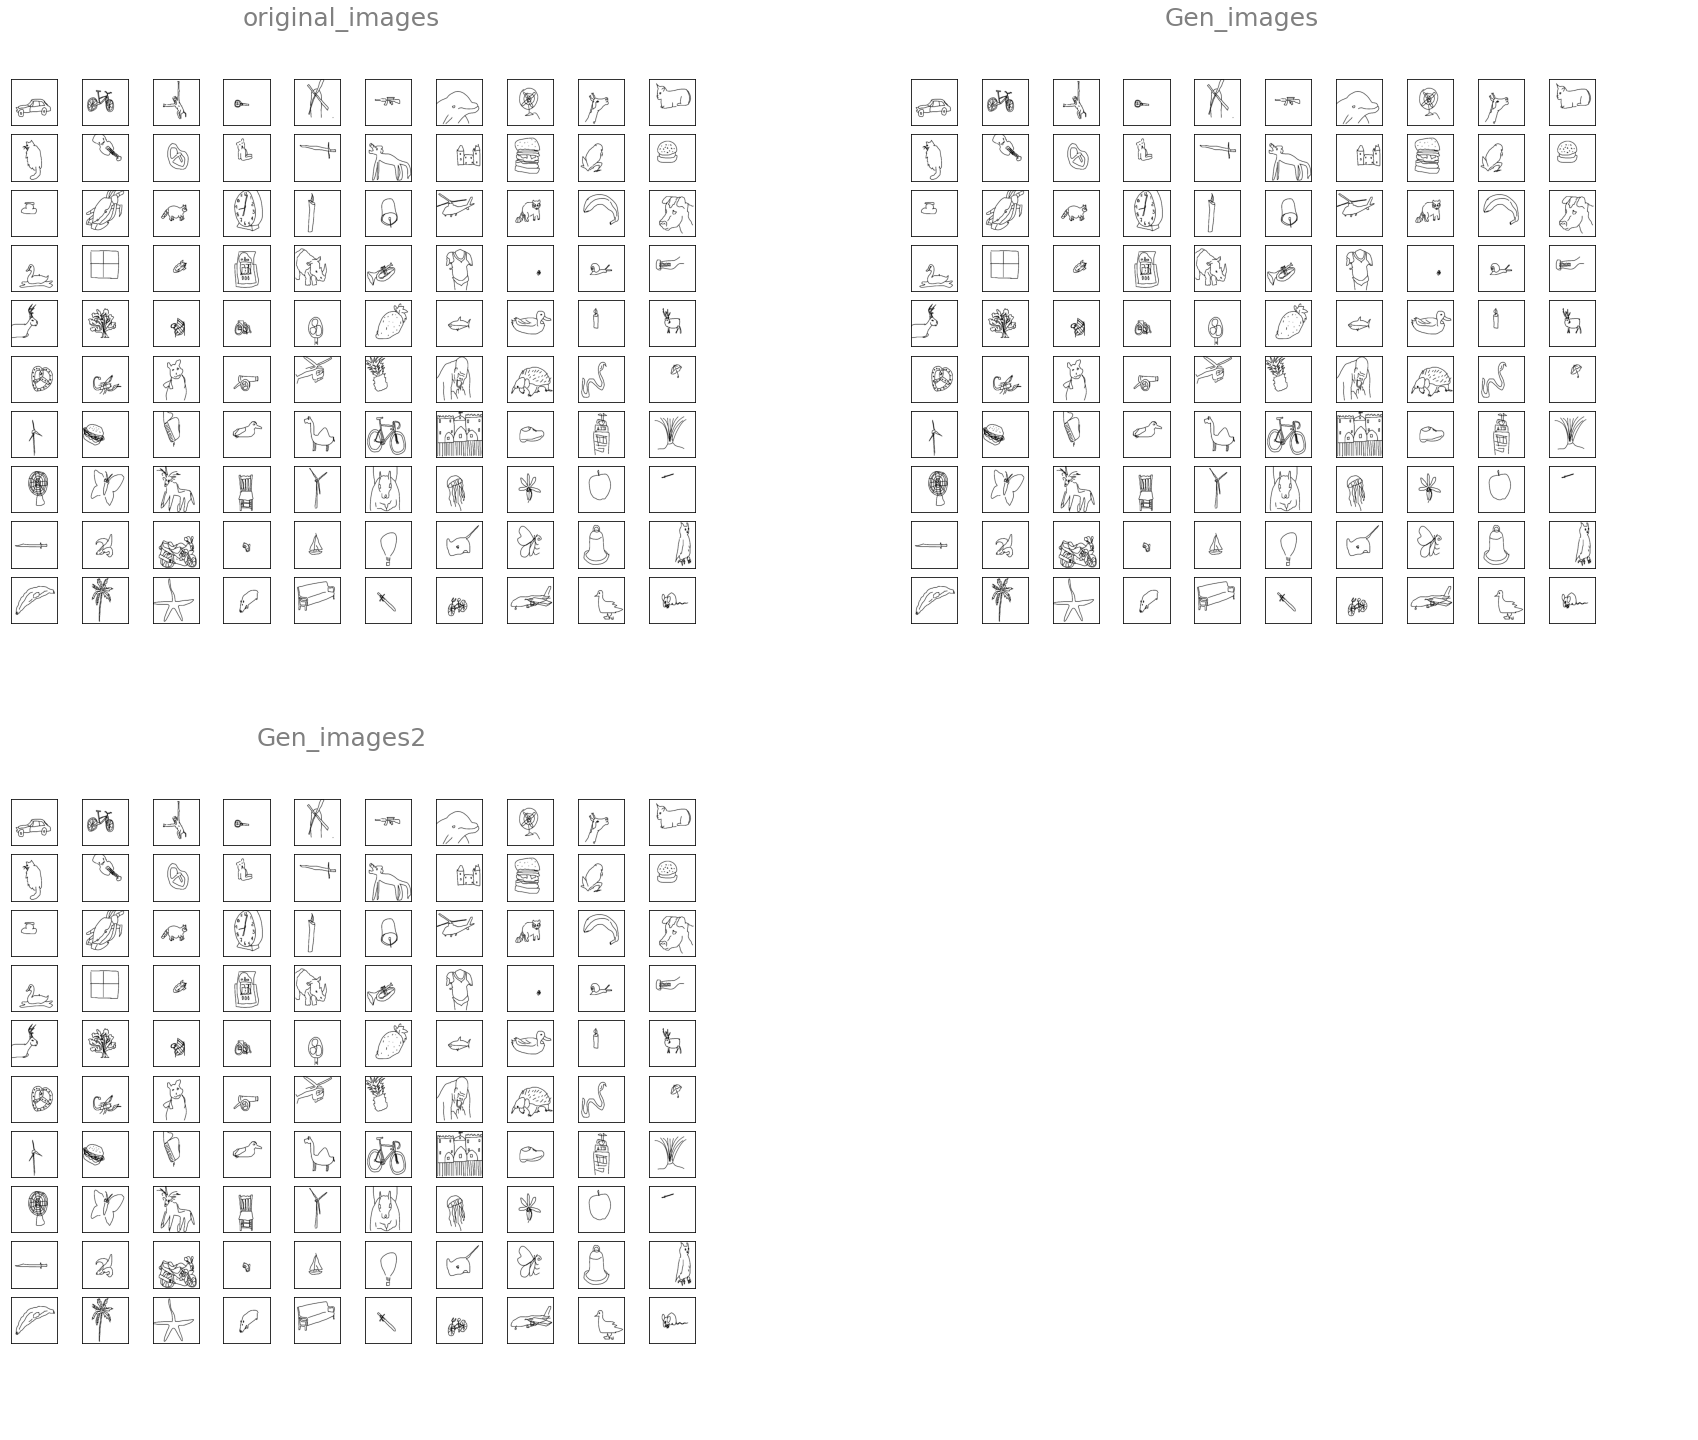

In [59]:
d = {'original_images': original_images, "Gen_images": original_images, 'Gen_images2':original_images}
compare_grid_plot(d, n_row=10, n_column=10, save_path='./results_Llava_captioning/test')

In [ ]:
compare_grid_plot(original_images, images_generated_prompt1, n_row=10, n_column=10)

In [ ]:
compare_grid_plot(original_images, images_generated_prompt2, n_row=10, n_column=10)

In [ ]:
compare_grid_plot(original_images, images_generated_prompt3, n_row=10, n_column=10)